In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("notebook")
# sns.set_style("darkgrid")
%load_ext lab_black

In [2]:
dar_path_dict_dict = {
    y: {
        z.split("/")[-1].split("__")[-2]: z
        for z in sorted(glob.glob("downstream_analysis/DARs/" + y + "/*__DARs.bed"))
    }
    for y in [x.split("/")[-1] for x in sorted(glob.glob("downstream_analysis/DARs/*"))]
}
dar_path_dict_dict

{'BIO_ddseq_1.FIXEDCELLS.05k': {'B_cell': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.05k/BIO_ddseq_1.FIXEDCELLS.05k__B_cell__DARs.bed',
  'CD14+_monocyte': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.05k/BIO_ddseq_1.FIXEDCELLS.05k__CD14+_monocyte__DARs.bed',
  'CD4+_T_cell': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.05k/BIO_ddseq_1.FIXEDCELLS.05k__CD4+_T_cell__DARs.bed',
  'Natural_killer_cell': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.05k/BIO_ddseq_1.FIXEDCELLS.05k__Natural_killer_cell__DARs.bed'},
 'BIO_ddseq_1.FIXEDCELLS.15k': {'B_cell': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.15k/BIO_ddseq_1.FIXEDCELLS.15k__B_cell__DARs.bed',
  'CD14+_monocyte': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.15k/BIO_ddseq_1.FIXEDCELLS.15k__CD14+_monocyte__DARs.bed',
  'CD4+_T_cell': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.15k/BIO_ddseq_1.FIXEDCELLS.15k__CD4+_T_cell__DARs.bed',
  'Cytotoxic_T_cell': 'downstream_analysis/DARs/BIO_ddseq_1.FIXEDCELLS.15k/BI

In [3]:
import os

In [4]:
if not os.path.exists("df_merged_dars.csv"):

    df_merged = pd.DataFrame()
    df_n_dars = pd.DataFrame()
    for sample, dar_path_dict in dar_path_dict_dict.items():
        print(sample)
        for cell_type, dar_path in dar_path_dict.items():
            print(cell_type)
            df = pd.read_csv(dar_path, sep="\t", header=None)
            df["sample"] = sample
            df_merged = pd.concat([df_merged, df.iloc[:2000]])

            df_n_dars.at[sample, cell_type] = len(df)

    df_merged.to_csv("df_merged_dars.csv", index=True)
    df_n_dars.to_csv("df_n_dars.csv", index=True)

else:
    df_merged = pd.read_csv("df_merged_dars.csv", index_col=0)
    df_n_dars = pd.read_csv("df_n_dars.csv", index_col=0)

df_merged["sample"] = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    .replace("facsfacs", "facs")
    for x in df_merged["sample"]
]
df_n_dars.index = [
    x.replace("CNA_10xv11_4", "CNA_10xv11c_1")
    .replace("CNA_10xv11_5", "CNA_10xv11c_2")
    .replace("BRO_mtscatac", "BRO_mtscatacfacs")
    .replace("facsfacs", "facs")
    for x in list(df_n_dars.index)
]

In [5]:
df_merged

,0,1,2,3,4,5,6,sample
0,chr1,983896,984396,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k
1,chr1,1833959,1834459,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k
2,chr1,3680636,3681136,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k
3,chr1,6735260,6735760,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k
4,chr1,8281932,8282432,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k
...,...,...,...,...,...,...,...,...
1995,chr7,142784678,142785178,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k
1996,chr2,176638062,176638562,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k
1997,chr7,25028565,25029065,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k
1998,chr20,2713216,2713716,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k


In [6]:
df_n_dars

,B_cell,CD14+_monocyte,CD4+_T_cell,Natural_killer_cell,Cytotoxic_T_cell,CD16+_monocyte,Dendritic_cell
BIO_ddseq_1.FIXEDCELLS.05k,5640.0,14438.0,2934.0,2608.0,NaN,NaN,NaN
BIO_ddseq_1.FIXEDCELLS.15k,10029.0,15524.0,2354.0,2514.0,462.0,NaN,NaN
BIO_ddseq_1.FIXEDCELLS.1k,5984.0,17148.0,2899.0,3400.0,NaN,NaN,NaN
BIO_ddseq_1.FIXEDCELLS.25k,9149.0,12920.0,3669.0,4064.0,3215.0,NaN,NaN
BIO_ddseq_1.FIXEDCELLS.2k,6767.0,15617.0,2796.0,3927.0,1612.0,NaN,NaN
...,...,...,...,...,...,...,...
VIB_hydrop_2.FIXEDCELLS.05k,6824.0,35125.0,9124.0,NaN,NaN,NaN,NaN
VIB_hydrop_2.FIXEDCELLS.15k,5137.0,34145.0,10134.0,NaN,9100.0,21532.0,NaN
VIB_hydrop_2.FIXEDCELLS.1k,5062.0,37938.0,7643.0,NaN,9619.0,NaN,NaN
VIB_hydrop_2.FIXEDCELLS.25k,7128.0,34562.0,10689.0,NaN,7877.0,NaN,NaN


In [7]:
df_merged.columns = [
    "chrom",
    "start",
    "end",
    "cell_type",
    "logfc",
    "strand",
    "p_val",
    "sample",
]

In [8]:
df_merged["tech"] = [x.split("_")[1] for x in df_merged["sample"]]

In [9]:
df_merged["depth"] = [x.split(".")[-1] for x in df_merged["sample"]]

In [10]:
depth_dict = {"05k": 500, "15k": 1500, "1k": 1000, "25k": 2500, "2k": 2000, "3k": 3000}

In [11]:
df_merged["depth_int"] = [depth_dict[x.split(".")[-1]] for x in df_merged["sample"]]

In [12]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,depth,depth_int
0,chr1,983896,984396,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
1,chr1,1833959,1834459,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
2,chr1,3680636,3681136,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
3,chr1,6735260,6735760,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
4,chr1,8281932,8282432,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
...,...,...,...,...,...,...,...,...,...,...,...
1995,chr7,142784678,142785178,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1996,chr2,176638062,176638562,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1997,chr7,25028565,25029065,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1998,chr20,2713216,2713716,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000


In [13]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv2": "10x v2",
    "ddseq": "ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "s3atac": "s3-ATAC",
}

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "CD4+ T cells",
    "Cytotoxic_T_cell": "CD8+ T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

cell_type_order = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
    "CD14+_monocyte",
    "CD16+_monocyte",
    "Dendritic_cell",
]

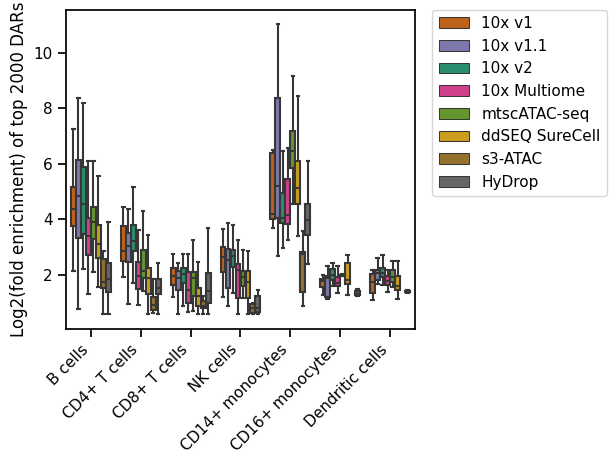

In [14]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="cell_type",
    y="logfc",
    hue="tech",
    order=cell_type_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    fliersize=0,
    showfliers=False,
)
plt.xticks(rotation=45, ha="right")

plt.ylabel("Log2(fold enrichment) of top 2000 DARs")
plt.xlabel("")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels_alias = [cell_type_alias_dict[x] for x in labels]
ax.set_xticklabels(labels_alias)


handles, labels = ax.get_legend_handles_labels()
l = plt.legend(
    handles[0 : len(tech_order)],
    [tech_alias_dict[x] for x in labels[0 : len(tech_order)]],
    bbox_to_anchor=(1.05, 1),
    loc=2,
    borderaxespad=0.0,
)
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

In [15]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,depth,depth_int
0,chr1,983896,984396,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
1,chr1,1833959,1834459,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
2,chr1,3680636,3681136,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
3,chr1,6735260,6735760,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
4,chr1,8281932,8282432,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
...,...,...,...,...,...,...,...,...,...,...,...
1995,chr7,142784678,142785178,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1996,chr2,176638062,176638562,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1997,chr7,25028565,25029065,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1998,chr20,2713216,2713716,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000


<AxesSubplot: xlabel='tech', ylabel='logfc'>

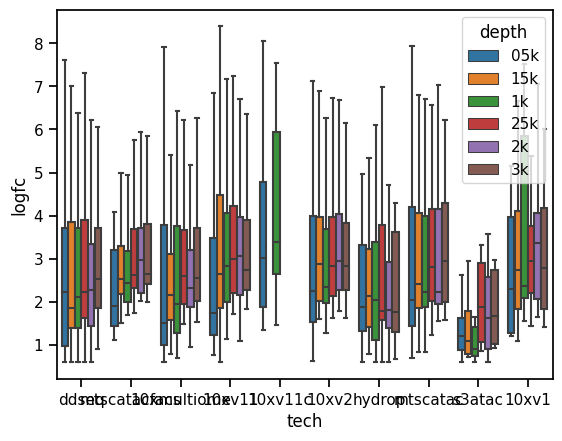

In [16]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="tech",
    y="logfc",
    hue="depth",
    # order=cell_type_order,
    # hue_order=tech_order,
    # palette=tech_color_palette,
    ax=ax,
    # fliersize=0,
    showfliers=False,
)

In [17]:
tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_order = [
    "10xv1",
    "10xv11",
    "10xv2",
    "10xmultiome",
    "mtscatac",
    "ddseq",
    "s3atac",
    "hydrop",
]

In [18]:
df_merged.groupby("cell_type")["logfc"].median()

cell_type
B_cell                 3.461929
CD14+_monocyte         4.502180
CD16+_monocyte         1.854074
CD4+_T_cell            2.206064
Cytotoxic_T_cell       1.629157
Dendritic_cell         2.025846
Natural_killer_cell    2.191897
Name: logfc, dtype: float64

<AxesSubplot: xlabel='depth_int', ylabel='logfc'>

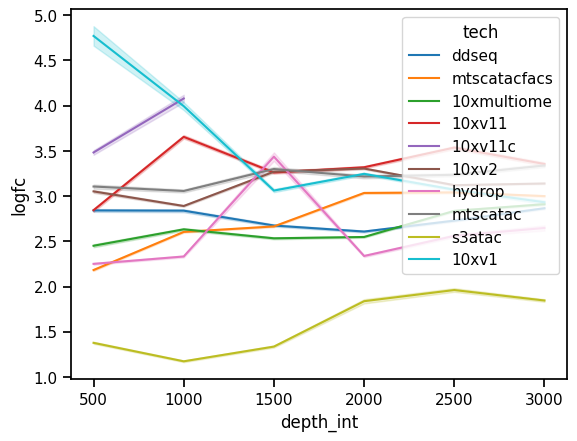

In [19]:
sns.lineplot(df_merged, x="depth_int", y="logfc", hue="tech")

In [20]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,depth,depth_int
0,chr1,983896,984396,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
1,chr1,1833959,1834459,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
2,chr1,3680636,3681136,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
3,chr1,6735260,6735760,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
4,chr1,8281932,8282432,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
...,...,...,...,...,...,...,...,...,...,...,...
1995,chr7,142784678,142785178,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1996,chr2,176638062,176638562,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1997,chr7,25028565,25029065,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1998,chr20,2713216,2713716,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000


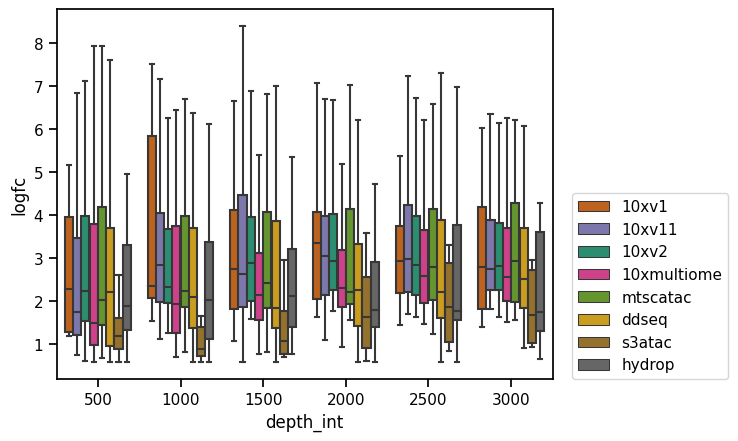

In [21]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="depth_int",
    y="logfc",
    hue="tech",
    # order=tech_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    # fliersize=0,
    showfliers=False,
)

plt.legend(loc=(1.04, 0))

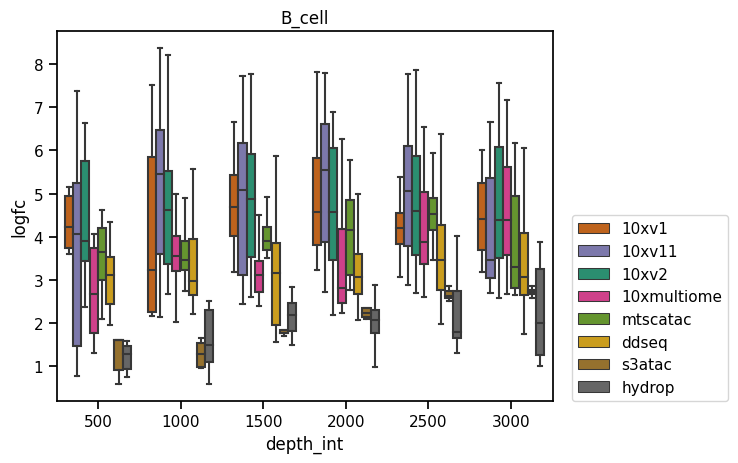

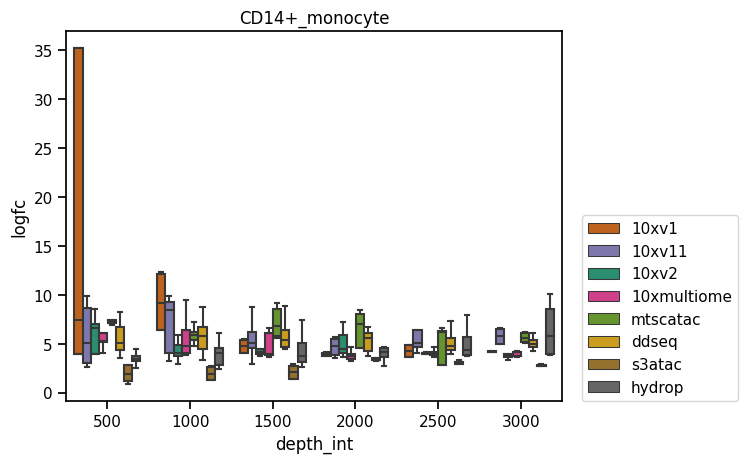

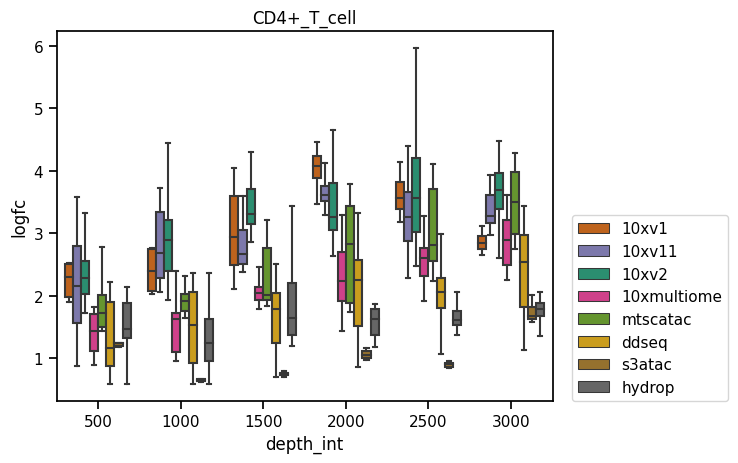

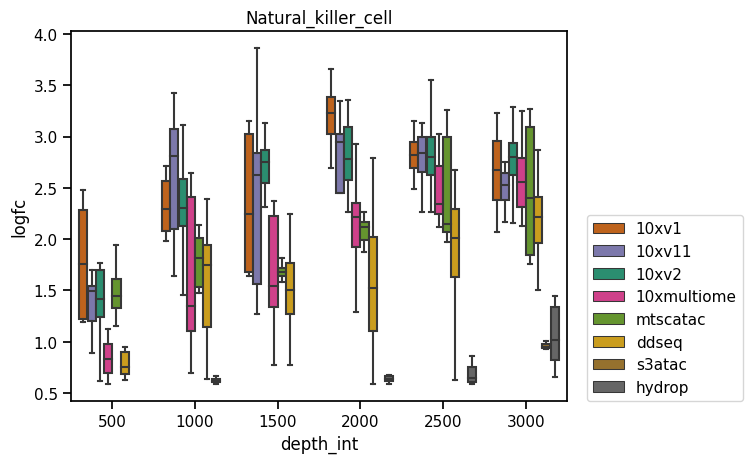

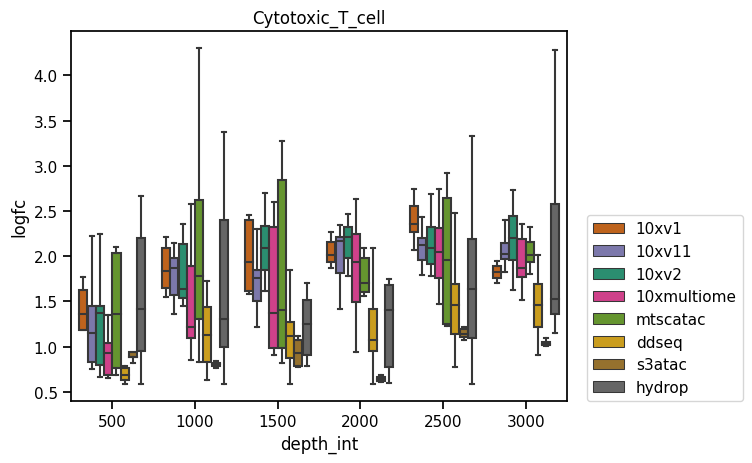

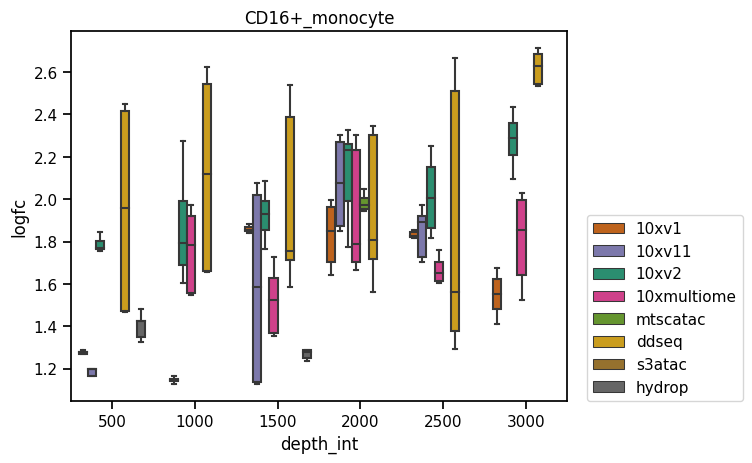

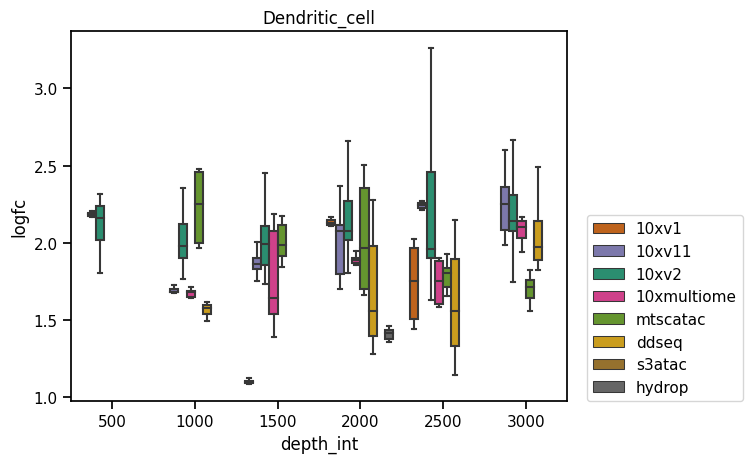

In [22]:
for cell_type in df_merged["cell_type"].unique():
    df_tmp = df_merged[df_merged["cell_type"] == cell_type]

    fig, ax = plt.subplots()
    sns.boxplot(
        df_tmp,
        x="depth_int",
        y="logfc",
        hue="tech",
        # order=tech_order,
        hue_order=tech_order,
        palette=tech_color_palette,
        ax=ax,
        # fliersize=0,
        showfliers=False,
    )

    plt.legend(loc=(1.04, 0))
    plt.title(cell_type)

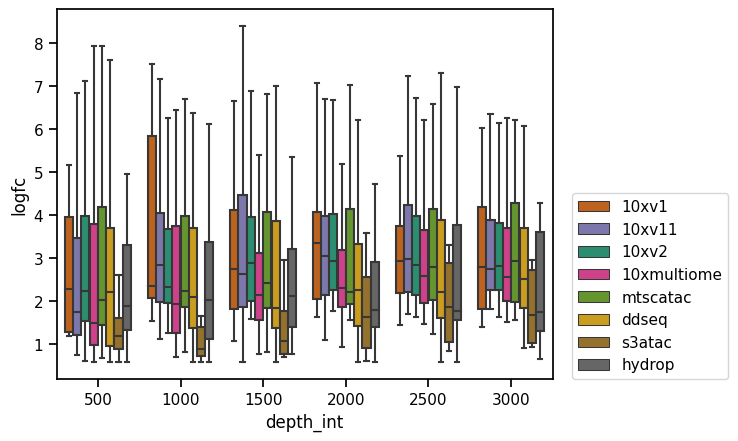

In [23]:
fig, ax = plt.subplots()
sns.boxplot(
    df_merged,
    x="depth_int",
    y="logfc",
    hue="tech",
    # order=tech_order,
    hue_order=tech_order,
    palette=tech_color_palette,
    ax=ax,
    # fliersize=0,
    showfliers=False,
)

plt.legend(loc=(1.04, 0))

In [24]:
labels

['10xv1',
 '10xv11',
 '10xv2',
 '10xmultiome',
 'mtscatac',
 'ddseq',
 's3atac',
 'hydrop']

In [25]:
plt.tight_layout()
plt.savefig(
    "plts_final/FIXEDCELLS__top1k_DARs_logfc.png",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)
plt.savefig(
    "plts_final/FIXEDCELLS__top1k_DARs_logfc.svg",
    dpi=600,
    facecolor="white",
    bbox_inches="tight",
)

<Figure size 640x480 with 0 Axes>

In [26]:
df_medians = pd.DataFrame(
    df_merged.groupby(["tech", "depth_int"])["logfc"].median()
).reset_index()

In [27]:
df_medians

,tech,depth_int,logfc
0,10xmultiome,500,1.503596
1,10xmultiome,1000,1.933143
2,10xmultiome,1500,2.156085
3,10xmultiome,2000,2.305543
4,10xmultiome,2500,2.586648
5,10xmultiome,3000,2.558958
6,10xv1,500,2.283869
7,10xv1,1000,2.360557
8,10xv1,1500,2.741653
9,10xv1,2000,3.364191


<AxesSubplot: xlabel='depth_int', ylabel='logfc'>

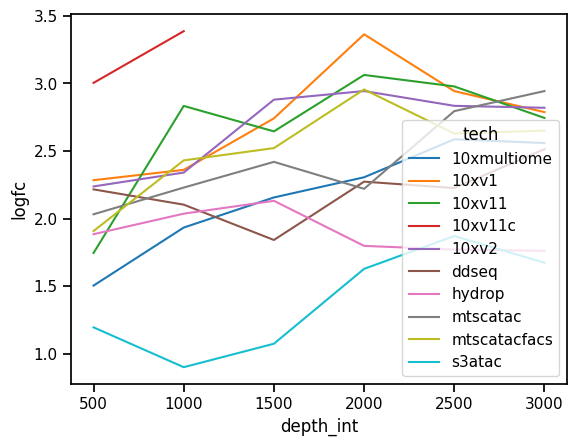

In [28]:
sns.lineplot(df_medians, x="depth_int", y="logfc", hue="tech")

In [29]:
df_merged

,chrom,start,end,cell_type,logfc,strand,p_val,sample,tech,depth,depth_int
0,chr1,983896,984396,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
1,chr1,1833959,1834459,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
2,chr1,3680636,3681136,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
3,chr1,6735260,6735760,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
4,chr1,8281932,8282432,B_cell,2.823604,.,4.899570e-23,BIO_ddseq_1.FIXEDCELLS.05k,ddseq,05k,500
...,...,...,...,...,...,...,...,...,...,...,...
1995,chr7,142784678,142785178,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1996,chr2,176638062,176638562,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1997,chr7,25028565,25029065,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000
1998,chr20,2713216,2713716,Cytotoxic_T_cell,1.623879,.,4.653712e-140,VIB_hydrop_2.FIXEDCELLS.2k,hydrop,2k,2000


<AxesSubplot: xlabel='depth_int', ylabel='logfc'>

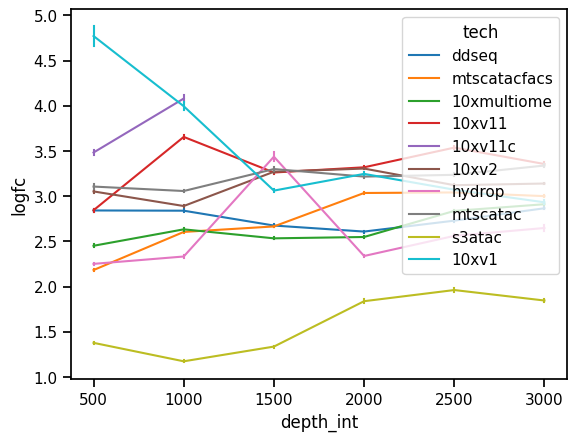

In [30]:
sns.lineplot(
    df_merged,
    x="depth_int",
    y="logfc",
    hue="tech",
    err_style="bars",
    errorbar=("se", 2),
)

<AxesSubplot: xlabel='chrom', ylabel='cell_type'>

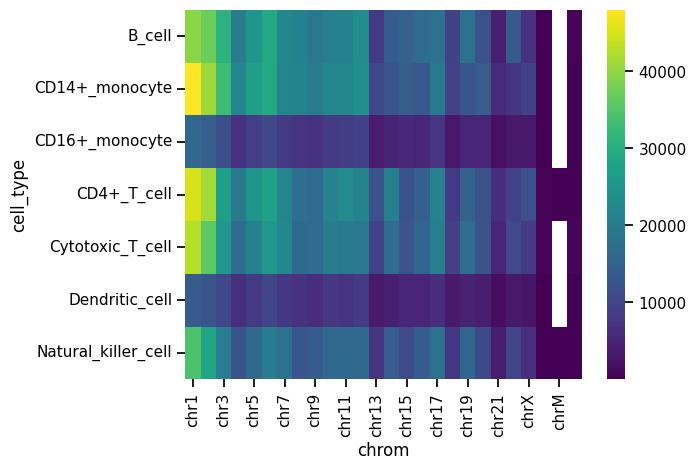

In [31]:
df_chroms = pd.DataFrame(
    df_merged.groupby("cell_type")["chrom"].value_counts()
).unstack()
chroms = ["chr" + str(x + 1) for x in range(0, 22)] + ["chrX", "chrY", "chrM"]
df_tmp = df_chroms["chrom"][chroms]
nonstandard_chroms = list(set(df_chroms["chrom"].columns) - set(chroms))
df_tmp["Contigs"] = df_chroms["chrom"][nonstandard_chroms].sum(axis=1)


sns.heatmap(df_tmp, cmap="viridis")

# combined figure

In [32]:
df_merged["depth"].unique()

array(['05k', '15k', '1k', '25k', '2k', '3k'], dtype=object)

In [33]:
cell_type_order = [
    "B_cell",
    "CD14+_monocyte",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Dendritic_cell",
    "Natural_killer_cell",
    "CD16+_monocyte",
]

tech_alias_dict = {
    "10xmultiome": "10x Multiome",
    "10xv1": "10x v1",
    "10xv11": "10x v1.1",
    "10xv11c": "10x v1.1 (Control)",
    "10xv2": "10x v2",
    "ddseq": "Bio-Rad ddSEQ SureCell",
    "hydrop": "HyDrop",
    "mtscatac": "mtscATAC-seq",
    "mtscatacfacs": "mtscATAC-seq (FACS)",
    "s3atac": "s3-ATAC",
}

tech_color_palette = {
    "10xv2": "#1b9e77",
    "10xv1": "#d95f02",
    "10xv11": "#7570b3",
    "10xmultiome": "#e7298a",
    "mtscatac": "#66a61e",
    "ddseq": "#e6ab02",
    "s3atac": "#a6761d",
    "hydrop": "#666666",
}

tech_alias_color_palette = {
    "10x v2": "#1b9e77",
    "10x v1": "#d95f02",
    "10x v1.1": "#7570b3",
    "10x v1.1 (Control)": "#7570b3",
    "10x Multiome": "#e7298a",
    "mtscATAC-seq": "#66a61e",
    "mtscATAC-seq (FACS)": "#66a61e",
    "Bio-Rad ddSEQ SureCell": "#e6ab02",
    "s3-ATAC": "#a6761d",
    "HyDrop": "#666666",
}

tech_alias_order = [
    "10x v1",
    "10x v1.1",
    "10x v1.1 (Control)",
    "10x v2",
    "10x Multiome",
    "mtscATAC-seq",
    "mtscATAC-seq (FACS)",
    "Bio-Rad ddSEQ SureCell",
    "s3-ATAC",
    "HyDrop",
]

cell_type_alias_dict = {
    "B_cell": "B cells",
    "CD14+_monocyte": "CD14+ monocytes",
    "CD4+_T_cell": "Naive T cells",
    "Cytotoxic_T_cell": "Cytotoxic T cells",
    "Dendritic_cell": "Dendritic cells",
    "Natural_killer_cell": "NK cells",
    "CD16+_monocyte": "CD16+ monocytes",
}

In [34]:
dashes = {
    "10x v1": "",
    "10x v1.1": "",
    "10x v1.1 (Control)": (2, 1),
    "10x v2": "",
    "10x Multiome": "",
    "mtscATAC-seq": "",
    "mtscATAC-seq (FACS)": (2, 1),
    "Bio-Rad ddSEQ SureCell": "",
    "ddSEQ SureCell": "",
    "s3-ATAC": "",
    "HyDrop": "",
}

In [35]:
df_merged_means = (
    df_merged.groupby(["tech", "depth", "cell_type"]).median().reset_index()
)
df_merged_means.index = df_merged_means["tech"] + "." + df_merged_means["depth"]
df_merged_means["tech_alias"] = [tech_alias_dict[x] for x in df_merged_means["tech"]]
df_merged_means = df_merged_means.sort_values("depth_int")

/tmp/ipykernel_3936101/766193464.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged.groupby(["tech", "depth", "cell_type"]).median().reset_index()


In [36]:
df_merged_means["fc"] = 2 ** df_merged_means["logfc"]

In [37]:
df_merged_means

,tech,depth,cell_type,start,end,logfc,p_val,depth_int,tech_alias,fc
10xmultiome.05k,10xmultiome,05k,B_cell,66656768.5,66657268.5,2.672941,2.033577e-29,500.0,10x Multiome,6.377277
ddseq.05k,ddseq,05k,CD16+_monocyte,68592897.0,68593397.0,1.960029,1.821201e-07,500.0,Bio-Rad ddSEQ SureCell,3.890699
ddseq.05k,ddseq,05k,CD14+_monocyte,68835157.0,68835657.0,5.062355,2.521870e-53,500.0,Bio-Rad ddSEQ SureCell,33.413391
10xv2.05k,10xv2,05k,Natural_killer_cell,63212706.5,63213206.5,1.416444,7.127572e-25,500.0,10x v2,2.669268
10xv2.05k,10xv2,05k,Dendritic_cell,62061093.5,62061593.5,2.160492,2.184614e-03,500.0,10x v2,4.470672
...,...,...,...,...,...,...,...,...,...,...
10xv2.3k,10xv2,3k,CD4+_T_cell,69967979.0,69968479.0,3.697309,0.000000e+00,3000.0,10x v2,12.971823
10xv2.3k,10xv2,3k,Cytotoxic_T_cell,62043745.0,62044245.0,2.206073,2.022250e-157,3000.0,10x v2,4.614176
10xv2.3k,10xv2,3k,Dendritic_cell,65017286.5,65017786.5,2.139543,5.802522e-30,3000.0,10x v2,4.406224
hydrop.3k,hydrop,3k,Natural_killer_cell,59306159.5,59306659.5,1.019426,7.703151e-71,3000.0,HyDrop,2.027112


In [67]:
sns.set_context("notebook")

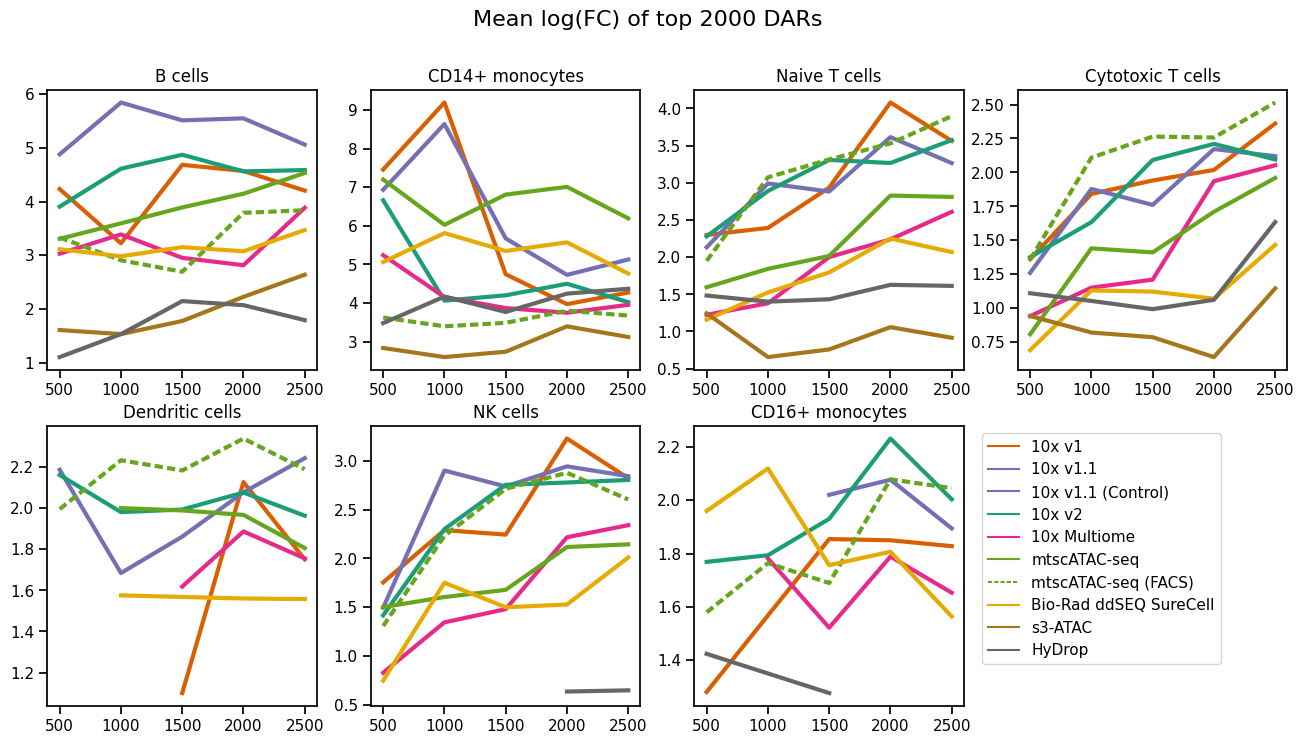

In [68]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows), sharey=False
)
fontsize_large = 18
for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="logfc",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle("Mean log(FC) of top 2000 DARs", fontsize=16)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()
plt.savefig("plts/dar_strength_dependency.svg", dpi=600, facecolor="w")
plt.savefig("plts/dar_strength_dependency.png", dpi=600, facecolor="w")

plt.show()

In [73]:
selected_celltypes = [
    "B_cell",
    "CD4+_T_cell",
    "Cytotoxic_T_cell",
    "Natural_killer_cell",
]

In [74]:
cell_type_order

['B_cell',
 'CD14+_monocyte',
 'CD4+_T_cell',
 'Cytotoxic_T_cell',
 'Dendritic_cell',
 'Natural_killer_cell',
 'CD16+_monocyte']

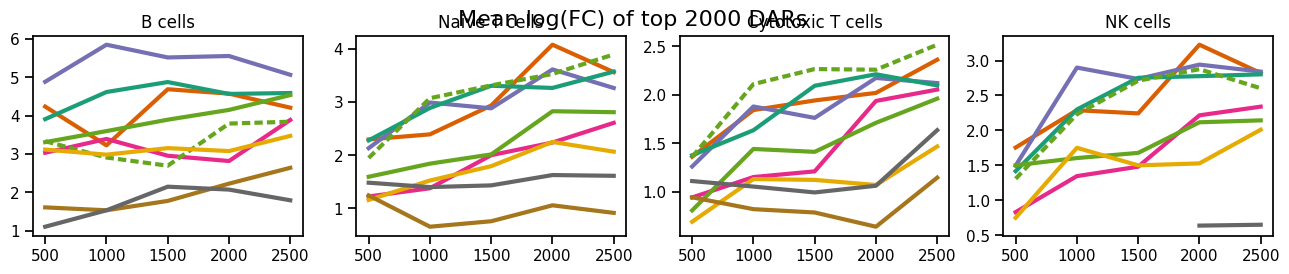

In [76]:
base_size = 4
n_cols = 4
n_rows = 1
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    # sharey=True,
    # sharex=True,
)
fontsize_large = 18
for cell_type in selected_celltypes:
    ax = axes.flatten()[selected_celltypes.index(cell_type)]
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="logfc",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle("Mean log(FC) of top 2000 DARs", fontsize=16)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()
plt.savefig(
    "plts/dar_strength_dependency_selectedcelltypes.svg", dpi=600, facecolor="w"
)
plt.savefig(
    "plts/dar_strength_dependency_selectedcelltypes.png", dpi=600, facecolor="w"
)

plt.show()

In [39]:
tech_alias_dict

{'10xmultiome': '10x Multiome',
 '10xv1': '10x v1',
 '10xv11': '10x v1.1',
 '10xv11c': '10x v1.1 (Control)',
 '10xv2': '10x v2',
 'ddseq': 'Bio-Rad ddSEQ SureCell',
 'hydrop': 'HyDrop',
 'mtscatac': 'mtscATAC-seq',
 'mtscatacfacs': 'mtscATAC-seq (FACS)',
 's3atac': 's3-ATAC'}

In [40]:
df_n_dars_stacked = df_n_dars.stack().reset_index()
df_n_dars_stacked.columns = ["sample", "cell_type", "n_dars"]

In [41]:
df_n_dars_stacked["depth"] = [x.split(".")[-1] for x in df_n_dars_stacked["sample"]]
df_n_dars_stacked["sample"] = [x.split(".")[0] for x in df_n_dars_stacked["sample"]]
df_n_dars_stacked["tech_alias"] = [
    tech_alias_dict[x.split("_")[1]] for x in df_n_dars_stacked["sample"]
]

df_n_dars_stacked

,sample,cell_type,n_dars,depth,tech_alias
0,BIO_ddseq_1,B_cell,5640.0,05k,Bio-Rad ddSEQ SureCell
1,BIO_ddseq_1,CD14+_monocyte,14438.0,05k,Bio-Rad ddSEQ SureCell
2,BIO_ddseq_1,CD4+_T_cell,2934.0,05k,Bio-Rad ddSEQ SureCell
3,BIO_ddseq_1,Natural_killer_cell,2608.0,05k,Bio-Rad ddSEQ SureCell
4,BIO_ddseq_1,B_cell,10029.0,15k,Bio-Rad ddSEQ SureCell
...,...,...,...,...,...
1222,VIB_hydrop_2,Cytotoxic_T_cell,7877.0,25k,HyDrop
1223,VIB_hydrop_2,B_cell,6239.0,2k,HyDrop
1224,VIB_hydrop_2,CD14+_monocyte,35279.0,2k,HyDrop
1225,VIB_hydrop_2,CD4+_T_cell,8525.0,2k,HyDrop


In [42]:
df_n_dars_stacked

,sample,cell_type,n_dars,depth,tech_alias
0,BIO_ddseq_1,B_cell,5640.0,05k,Bio-Rad ddSEQ SureCell
1,BIO_ddseq_1,CD14+_monocyte,14438.0,05k,Bio-Rad ddSEQ SureCell
2,BIO_ddseq_1,CD4+_T_cell,2934.0,05k,Bio-Rad ddSEQ SureCell
3,BIO_ddseq_1,Natural_killer_cell,2608.0,05k,Bio-Rad ddSEQ SureCell
4,BIO_ddseq_1,B_cell,10029.0,15k,Bio-Rad ddSEQ SureCell
...,...,...,...,...,...
1222,VIB_hydrop_2,Cytotoxic_T_cell,7877.0,25k,HyDrop
1223,VIB_hydrop_2,B_cell,6239.0,2k,HyDrop
1224,VIB_hydrop_2,CD14+_monocyte,35279.0,2k,HyDrop
1225,VIB_hydrop_2,CD4+_T_cell,8525.0,2k,HyDrop


In [43]:
df_n_dars_stacked_means = (
    df_n_dars_stacked.groupby(["tech_alias", "depth", "cell_type"])
    .median()
    .reset_index()
)
df_n_dars_stacked_means.index = (
    df_n_dars_stacked_means["tech_alias"] + "." + df_n_dars_stacked_means["depth"]
)
# df_n_dars_stacked_means["tech_alias"] = [tech_alias_dict[x] for x in df_n_dars_stacked_means["tech"]]
df_n_dars_stacked_means["depth_int"] = [
    depth_dict[x] for x in df_n_dars_stacked_means["depth"]
]
df_n_dars_stacked_means = df_n_dars_stacked_means.sort_values("depth_int")

/tmp/ipykernel_3936101/2876370292.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_n_dars_stacked.groupby(["tech_alias", "depth", "cell_type"])


In [44]:
dashes

{'10x v1': '',
 '10x v1.1': '',
 '10x v1.1 (Control)': (2, 1),
 '10x v2': '',
 '10x Multiome': '',
 'mtscATAC-seq': '',
 'mtscATAC-seq (FACS)': (2, 1),
 'Bio-Rad ddSEQ SureCell': '',
 'ddSEQ SureCell': '',
 's3-ATAC': '',
 'HyDrop': ''}

In [45]:
set(df_n_dars_stacked_means["tech_alias"])

{'10x Multiome',
 '10x v1',
 '10x v1.1',
 '10x v1.1 (Control)',
 '10x v2',
 'Bio-Rad ddSEQ SureCell',
 'HyDrop',
 'mtscATAC-seq',
 'mtscATAC-seq (FACS)',
 's3-ATAC'}

/tmp/ipykernel_3936101/1128948909.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["n_dars"] = df_tmp["n_dars"] / 1000
/tmp/ipykernel_3936101/1128948909.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["n_dars"] = df_tmp["n_dars"] / 1000
/tmp/ipykernel_3936101/1128948909.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

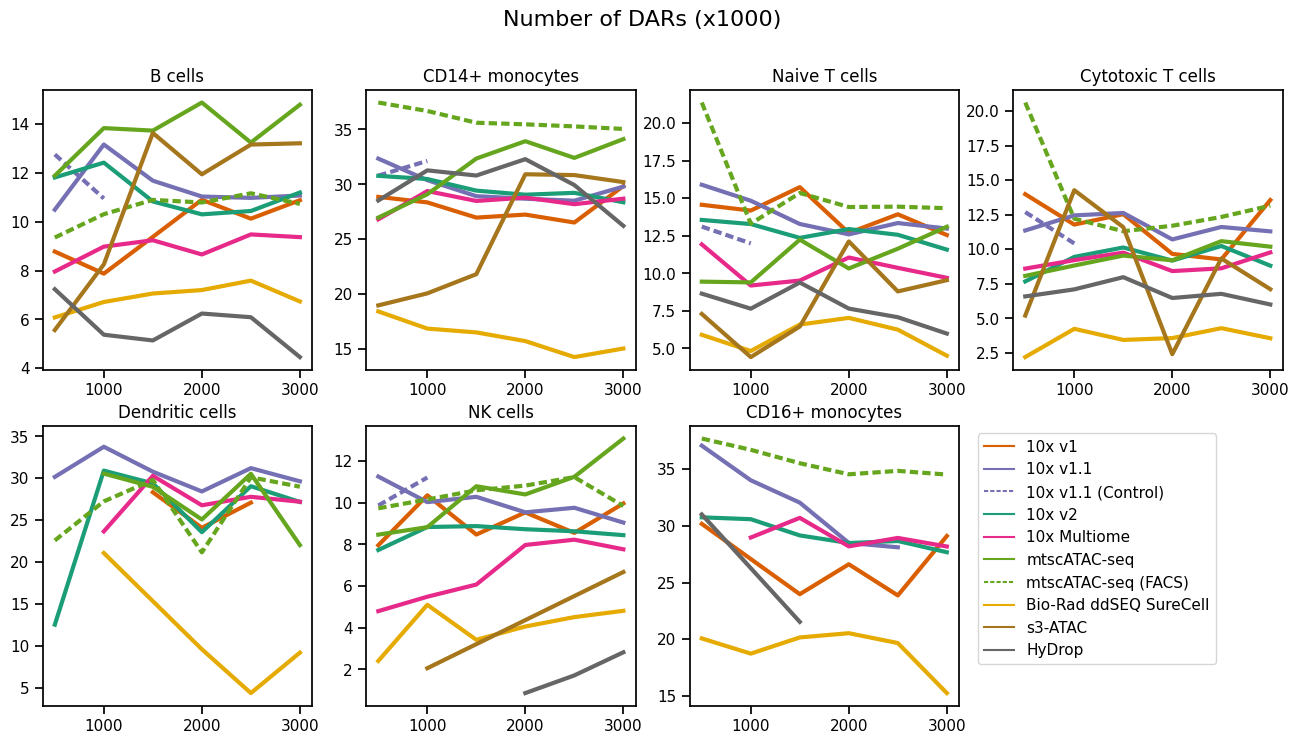

In [46]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows, n_cols, figsize=(base_size * n_cols, base_size * n_rows), sharey=False
)
fontsize_large = 18
for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_n_dars_stacked_means[df_n_dars_stacked_means["cell_type"] == cell_type]
    df_tmp["n_dars"] = df_tmp["n_dars"] / 1000
    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="n_dars",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle("Number of DARs (x1000)", fontsize=16)
# fig.delaxes(axes[1][-1])
# ax.get_legend()

# plt.tight_layout()
plt.savefig("plts/ndar_dependency.svg", dpi=600, facecolor="w")
plt.savefig("plts/ndar_dependency.png", dpi=600, facecolor="w")

plt.show()

# take only full downsampling samples

In [47]:
df_test = pd.DataFrame(df_n_dars.index)
df_test["sample"] = [x.split(".")[0] for x in df_test[0]]
df_test["depth"] = [x.split(".")[-1] for x in df_test[0]]
df_test["depth_int"] = [depth_dict[x] for x in df_test["depth"]]
df_test

,0,sample,depth,depth_int
0,BIO_ddseq_1.FIXEDCELLS.05k,BIO_ddseq_1,05k,500
1,BIO_ddseq_1.FIXEDCELLS.15k,BIO_ddseq_1,15k,1500
2,BIO_ddseq_1.FIXEDCELLS.1k,BIO_ddseq_1,1k,1000
3,BIO_ddseq_1.FIXEDCELLS.25k,BIO_ddseq_1,25k,2500
4,BIO_ddseq_1.FIXEDCELLS.2k,BIO_ddseq_1,2k,2000
...,...,...,...,...
225,VIB_hydrop_2.FIXEDCELLS.05k,VIB_hydrop_2,05k,500
226,VIB_hydrop_2.FIXEDCELLS.15k,VIB_hydrop_2,15k,1500
227,VIB_hydrop_2.FIXEDCELLS.1k,VIB_hydrop_2,1k,1000
228,VIB_hydrop_2.FIXEDCELLS.25k,VIB_hydrop_2,25k,2500


In [48]:
samples_passing = list(
    pd.DataFrame(df_test.groupby("sample")["depth_int"].max() >= 2500)[
        df_test.groupby("sample")["depth_int"].max() >= 2500
    ].index
)
samples_passing

['BIO_ddseq_1',
 'BIO_ddseq_2',
 'BIO_ddseq_3',
 'BIO_ddseq_4',
 'BRO_mtscatacfacs_1',
 'BRO_mtscatacfacs_2',
 'CNA_10xmultiome_1',
 'CNA_10xmultiome_2',
 'CNA_10xv11_1',
 'CNA_10xv11_2',
 'CNA_10xv11_3',
 'CNA_10xv2_1',
 'CNA_10xv2_2',
 'CNA_mtscatac_1',
 'EPF_hydrop_1',
 'EPF_hydrop_2',
 'EPF_hydrop_3',
 'EPF_hydrop_4',
 'HAR_ddseq_1',
 'HAR_ddseq_2',
 'MDC_mtscatac_1',
 'MDC_mtscatac_2',
 'OHS_s3atac_1',
 'SAN_10xmultiome_1',
 'SAN_10xmultiome_2',
 'TXG_10xv11_1',
 'TXG_10xv2_1',
 'TXG_10xv2_2',
 'UCS_ddseq_1',
 'UCS_ddseq_2',
 'VIB_10xv1_1',
 'VIB_10xv1_2',
 'VIB_10xv2_1',
 'VIB_10xv2_2',
 'VIB_hydrop_2']

In [49]:
df_merged["supersample"] = [x.split(".")[0] for x in df_merged["sample"]]

In [50]:
df_merged_sub = df_merged[df_merged["supersample"].isin(samples_passing)]

In [51]:
df_merged_sub = df_merged_sub[df_merged_sub["depth_int"] <= 2500]

In [52]:
df_merged_means = (
    df_merged_sub.groupby(["tech", "depth", "cell_type"]).median().reset_index()
)
df_merged_means.index = df_merged_means["tech"] + "." + df_merged_means["depth"]
df_merged_means["tech_alias"] = [tech_alias_dict[x] for x in df_merged_means["tech"]]
df_merged_means = df_merged_means.sort_values("depth_int")

/tmp/ipykernel_3936101/370374895.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_merged_sub.groupby(["tech", "depth", "cell_type"]).median().reset_index()


In [53]:
df_merged_means["fc"] = 2 ** df_merged_means["logfc"]

In [54]:
df_merged_means

,tech,depth,cell_type,start,end,logfc,p_val,depth_int,tech_alias,fc
10xmultiome.05k,10xmultiome,05k,B_cell,66203772.0,66204272.0,3.030383,2.033577e-29,500.0,10x Multiome,8.170264
ddseq.05k,ddseq,05k,Cytotoxic_T_cell,63220863.5,63221363.5,0.689805,2.348673e-08,500.0,Bio-Rad ddSEQ SureCell,1.613065
ddseq.05k,ddseq,05k,CD4+_T_cell,62593484.0,62593984.0,1.159467,1.877121e-63,500.0,Bio-Rad ddSEQ SureCell,2.233749
ddseq.05k,ddseq,05k,CD16+_monocyte,68592897.0,68593397.0,1.960029,1.821201e-07,500.0,Bio-Rad ddSEQ SureCell,3.890699
ddseq.05k,ddseq,05k,CD14+_monocyte,68835157.0,68835657.0,5.062355,2.521870e-53,500.0,Bio-Rad ddSEQ SureCell,33.413391
...,...,...,...,...,...,...,...,...,...,...
10xv2.25k,10xv2,25k,CD16+_monocyte,68437317.0,68437817.0,2.003884,9.753071e-27,2500.0,10x v2,4.010782
10xv2.25k,10xv2,25k,CD14+_monocyte,70038426.0,70038926.0,4.022034,1.758341e-282,2500.0,10x v2,16.246237
hydrop.25k,hydrop,25k,Cytotoxic_T_cell,64674527.0,64675027.0,1.633864,4.486498e-183,2500.0,HyDrop,3.103431
10xmultiome.25k,10xmultiome,25k,Dendritic_cell,68854127.0,68854627.0,1.755238,5.774983e-31,2500.0,10x Multiome,3.375821


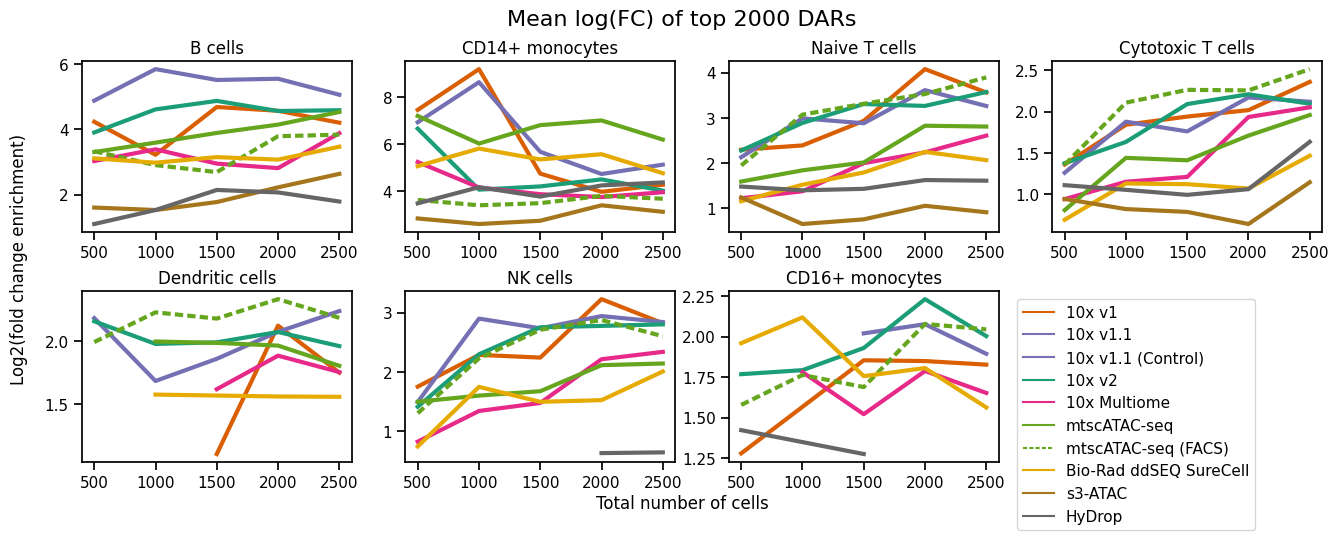

In [55]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    sharey=False,
)
fig.subplots_adjust(hspace=0.35)
# fig.subplots_adjust(wspace=0.2)
fontsize_large = 18
for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="logfc",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle("Mean log(FC) of top 2000 DARs", fontsize=16)
fig.text(0.5, 0.02, "Total number of cells", ha="center", fontsize=12)
fig.text(
    0.08,
    0.5,
    "Log2(fold change enrichment)",
    va="center",
    rotation="vertical",
    fontsize=12,
)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()
plt.savefig("plts/dar_strength_dependency_2500min.svg", dpi=600, facecolor="w")
plt.savefig("plts/dar_strength_dependency_2500min.png", dpi=600, facecolor="w")

plt.show()

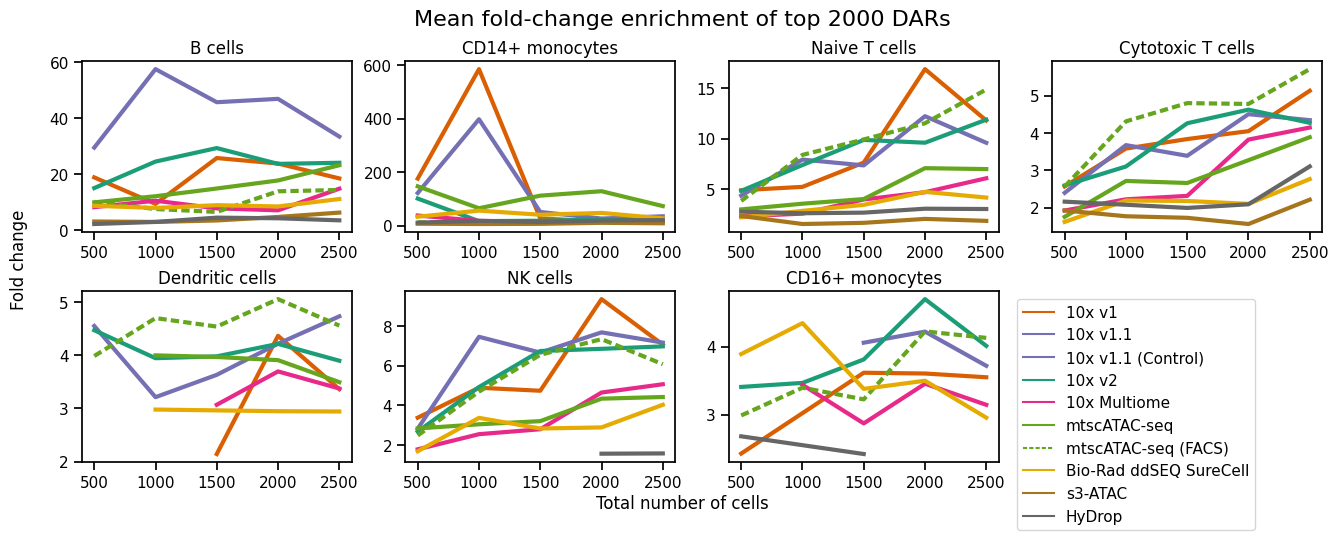

In [56]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    sharey=False,
)
fig.subplots_adjust(hspace=0.35)
# fig.subplots_adjust(wspace=0.2)
fontsize_large = 18
for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_merged_means[df_merged_means["cell_type"] == cell_type]

    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="fc",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle("Mean fold-change enrichment of top 2000 DARs", fontsize=16)
fig.text(0.5, 0.02, "Total number of cells", ha="center", fontsize=12)
fig.text(
    0.08,
    0.5,
    "Fold change",
    va="center",
    rotation="vertical",
    fontsize=12,
)
# fig.delaxes(axes[1][-1])
# ax.get_legend()
# plt.tight_layout()
plt.savefig("plts/dar_fc_dependency_2500min.svg", dpi=600, facecolor="w")
plt.savefig("plts/dar_fc_dependency_2500min.png", dpi=600, facecolor="w")

plt.show()

In [57]:
tech_alias_dict

{'10xmultiome': '10x Multiome',
 '10xv1': '10x v1',
 '10xv11': '10x v1.1',
 '10xv11c': '10x v1.1 (Control)',
 '10xv2': '10x v2',
 'ddseq': 'Bio-Rad ddSEQ SureCell',
 'hydrop': 'HyDrop',
 'mtscatac': 'mtscATAC-seq',
 'mtscatacfacs': 'mtscATAC-seq (FACS)',
 's3atac': 's3-ATAC'}

In [58]:
df_n_dars_stacked = df_n_dars.stack().reset_index()
df_n_dars_stacked.columns = ["sample", "cell_type", "n_dars"]

In [59]:
df_n_dars_stacked["depth"] = [x.split(".")[-1] for x in df_n_dars_stacked["sample"]]
df_n_dars_stacked["sample"] = [x.split(".")[0] for x in df_n_dars_stacked["sample"]]
df_n_dars_stacked["tech_alias"] = [
    tech_alias_dict[x.split("_")[1]] for x in df_n_dars_stacked["sample"]
]

df_n_dars_stacked

,sample,cell_type,n_dars,depth,tech_alias
0,BIO_ddseq_1,B_cell,5640.0,05k,Bio-Rad ddSEQ SureCell
1,BIO_ddseq_1,CD14+_monocyte,14438.0,05k,Bio-Rad ddSEQ SureCell
2,BIO_ddseq_1,CD4+_T_cell,2934.0,05k,Bio-Rad ddSEQ SureCell
3,BIO_ddseq_1,Natural_killer_cell,2608.0,05k,Bio-Rad ddSEQ SureCell
4,BIO_ddseq_1,B_cell,10029.0,15k,Bio-Rad ddSEQ SureCell
...,...,...,...,...,...
1222,VIB_hydrop_2,Cytotoxic_T_cell,7877.0,25k,HyDrop
1223,VIB_hydrop_2,B_cell,6239.0,2k,HyDrop
1224,VIB_hydrop_2,CD14+_monocyte,35279.0,2k,HyDrop
1225,VIB_hydrop_2,CD4+_T_cell,8525.0,2k,HyDrop


In [60]:
df_n_dars_stacked

,sample,cell_type,n_dars,depth,tech_alias
0,BIO_ddseq_1,B_cell,5640.0,05k,Bio-Rad ddSEQ SureCell
1,BIO_ddseq_1,CD14+_monocyte,14438.0,05k,Bio-Rad ddSEQ SureCell
2,BIO_ddseq_1,CD4+_T_cell,2934.0,05k,Bio-Rad ddSEQ SureCell
3,BIO_ddseq_1,Natural_killer_cell,2608.0,05k,Bio-Rad ddSEQ SureCell
4,BIO_ddseq_1,B_cell,10029.0,15k,Bio-Rad ddSEQ SureCell
...,...,...,...,...,...
1222,VIB_hydrop_2,Cytotoxic_T_cell,7877.0,25k,HyDrop
1223,VIB_hydrop_2,B_cell,6239.0,2k,HyDrop
1224,VIB_hydrop_2,CD14+_monocyte,35279.0,2k,HyDrop
1225,VIB_hydrop_2,CD4+_T_cell,8525.0,2k,HyDrop


In [61]:
df_n_dars_stacked["supersample"] = [
    x.split(".")[0] for x in df_n_dars_stacked["sample"]
]
df_n_dars_stacked_sub = df_n_dars_stacked[
    df_n_dars_stacked["supersample"].isin(samples_passing)
]

In [62]:
df_n_dars_stacked_sub["depth_int"] = [
    depth_dict[x] for x in df_n_dars_stacked_sub["depth"]
]

/tmp/ipykernel_3936101/3492265384.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n_dars_stacked_sub["depth_int"] = [


In [63]:
df_n_dars_stacked_sub = df_n_dars_stacked_sub[
    df_n_dars_stacked_sub["depth_int"] <= 2500
]

In [64]:
df_n_dars_stacked_means = (
    df_n_dars_stacked_sub.groupby(["tech_alias", "depth", "cell_type"])
    .median()
    .reset_index()
)
df_n_dars_stacked_means.index = (
    df_n_dars_stacked_means["tech_alias"] + "." + df_n_dars_stacked_means["depth"]
)
# df_n_dars_stacked_means["tech_alias"] = [tech_alias_dict[x] for x in df_n_dars_stacked_means["tech"]]
df_n_dars_stacked_means["depth_int"] = [
    depth_dict[x] for x in df_n_dars_stacked_means["depth"]
]
df_n_dars_stacked_means = df_n_dars_stacked_means.sort_values("depth_int")

/tmp/ipykernel_3936101/3522849482.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_n_dars_stacked_sub.groupby(["tech_alias", "depth", "cell_type"])


/tmp/ipykernel_3936101/1570761211.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["n_dars"] = df_tmp["n_dars"] / 1000
/tmp/ipykernel_3936101/1570761211.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp["n_dars"] = df_tmp["n_dars"] / 1000
/tmp/ipykernel_3936101/1570761211.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

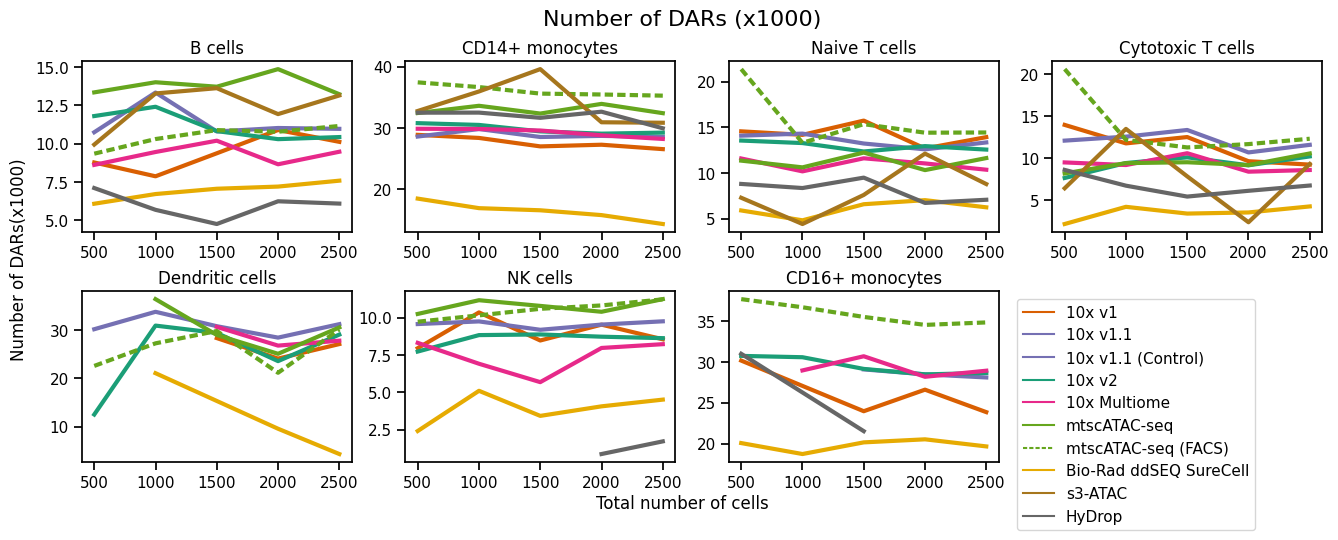

In [65]:
base_size = 4
n_cols = 4
n_rows = 2
fig, axes = plt.subplots(
    n_rows,
    n_cols,
    figsize=(base_size * n_cols, base_size * n_rows * 0.65),
    sharey=False,
)
fontsize_large = 18
fig.subplots_adjust(hspace=0.35)

for cell_type in cell_type_order:
    ax = axes.flatten()[cell_type_order.index(cell_type)]
    df_tmp = df_n_dars_stacked_means[df_n_dars_stacked_means["cell_type"] == cell_type]
    df_tmp["n_dars"] = df_tmp["n_dars"] / 1000
    sns.lineplot(
        data=df_tmp,
        x="depth_int",
        y="n_dars",
        hue="tech_alias",
        hue_order=tech_alias_order,
        style="tech_alias",
        dashes=dashes,
        ax=ax,
        palette=tech_alias_color_palette,
        linewidth=3,
        sort=False,
    )

    ax.set_ylabel(None)

    ax.set_title(cell_type_alias_dict[cell_type])
    if cell_type != cell_type_order[-1]:
        ax.get_legend().remove()

    if cell_type == cell_type_order[-1]:
        leg = ax.legend()
        for i in leg.legendHandles:
            i.set_linewidth(3)

        ax.legend(
            loc="upper left",
            bbox_to_anchor=(1.04, 1),
        )

        # ax.legend(
        #     loc="upper right",
        #     bbox_to_anchor=(1, -0.15),
        #     fancybox=False,
        #     shadow=False,
        #     ncol=len(tech_alias_order),
        #     handleheight=3,
        # )

    # ax.set_xlabel("Read depth (k/cell)", fontsize=14)
    ax.set_xlabel("")

for ax in axes.flatten():
    if not ax.lines:
        ax.set_axis_off()

fig.suptitle("Number of DARs (x1000)", fontsize=16)
fig.text(0.5, 0.02, "Total number of cells", ha="center", fontsize=12)
fig.text(
    0.08, 0.5, "Number of DARs(x1000)", va="center", rotation="vertical", fontsize=12
)

# fig.delaxes(axes[1][-1])
# ax.get_legend()

# plt.tight_layout()
plt.savefig("plts/ndar_dependency_2500min.svg", dpi=600, facecolor="w")
plt.savefig("plts/ndar_dependency_2500min.png", dpi=600, facecolor="w")

plt.show()